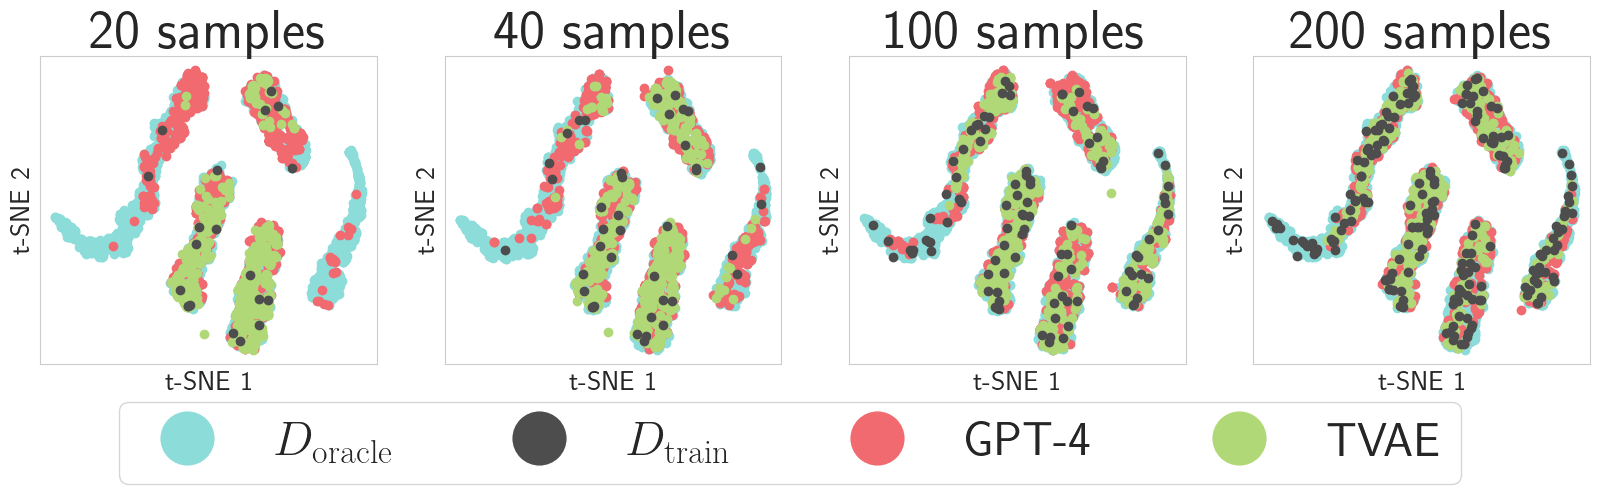

In [6]:

import sys
import os
sys.path.append(os.path.abspath('..'))

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 20,
})

%matplotlib inline
sns.set_style("whitegrid")



dataset = 'covid'
seed = 0
sample_sizes = [10, 20, 50, 100]
color_oracle = '#8cdcda'
color_gpt4 = '#f16a70'
color_tvae = '#b1d877'
color_original = '#4d4d4d'

color_models = [color_gpt4, color_tvae, color_original]


fig, axs = plt.subplots(1, 4, figsize=(20, 4))

model_list = ["tvae"]

for model in model_list:
    
    legend_labels = [r'$D_{\mathrm{oracle}}$', r'$D_{\mathrm{train}}$', 'GPT-4', model.upper()]
    legend_handles = []


    for i, ns in enumerate(sample_sizes):
        
        
        filename = f"./investigate_saves_all/investigate_{dataset}_{seed}_{ns}.pickle"

        with open(filename, 'rb') as handle:
            dict_data = pickle.load(handle)

        raw_data = dict_data['results']
        tsne_results = dict_data['tsne']

        X_train_pca = tsne_results['Oracle']

        axs[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='Oracle', color=color_oracle)

        for idx, sub_model in enumerate(['gpt4', model, 'Original']):
            mydf = raw_data[sub_model]['X']
            X_train_pca = tsne_results[sub_model]
            if sub_model == 'gpt4':
                label = 'GPT-4'
            elif sub_model == model:
                label = model.upper()
            axs[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], label=label, color=color_models[idx])
        axs[i].grid(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlabel('t-SNE 1')
        axs[i].set_ylabel('t-SNE 2')
        axs[i].set_title(f"{ns*2} samples")
        axs[i].title.set_size(40)
        

        if i == 0:
            for label in legend_labels:
                if label == r'$D_{\mathrm{oracle}}$':
                    color = color_oracle
                elif label == 'GPT-4':
                    color = color_gpt4
                elif label == model.upper():
                    color = color_tvae
                else:
                    color = color_original
                legend_handles.append(Line2D([0], [0], marker='o',  markersize=40,  color='w', label=label, markerfacecolor=color, ))

    fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=4, prop={'size': 35})
    plt.subplots_adjust(wspace=0.2)

    plt.show()